## Assignment 4
### Question 2] Coding: Classification with the decision tree model
#### Write a self-contained and fully functional Jupyter Notebook that:

### a) Loads the necessary libraries to run (e.g., scikit-learn)


In [230]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### b) Loads the dataset “digits” (see below for description) from the scikit-learn example datasets package. 
##### digits is a dataset of a hadnwritten digits. Each feature is the intensity of one pixel of an 8x8 image 


In [152]:
# loads digits dataset
digits = load_digits()
#print(digits)

# create feature matrix
x = digits.data

# create target vector - what we are going to predict
y = digits.target
digits.target_names

# view the first observation's feature values 
x[0]

# view the first observation's feature values as matrix 
digits.images[0]



array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
#visualize the observation's feature values as image
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### c) Instantiates a sklearn.tree.DecisionTreeClassifier. 

In [154]:
#class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)[source]¶

clf = tree.DecisionTreeClassifier(random_state = 1)
clf = clf.fit(digits.data, digits.target)

In [155]:
decision_tree = DecisionTreeClassifier()
print(decision_tree )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### d) Splits the dataset in training and testing sets using sklearn.model_selection.KFold cross validation (use K = 5).

In [231]:
kfold = KFold(n_splits=5)
kfold.get_n_splits(digits)
print(kf) 

<generator object _BaseKFold.split at 0x000001933017C1B0>


### e) Trains and tests the performance of the classifier in identifying the digits. 

In [232]:
for train_index, test_index in kf.split(digits):
    print('Train: %s, Test: %s' % (train_index, test_index))
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index] 

AttributeError: 'generator' object has no attribute 'split'

In [227]:
# simulate splitting a dataset of 20 observations into 5 folds

kf = KFold(n_splits=5, shuffle=False).split(range(5))
# print the contents of each training and testing set
print('{} {:^14} {}'.format('Iteration', 'Training', 'Testing '))
for iteration, data in enumerate(kf, start=1):
    print('{:^10} {} {:^22}'.format(iteration, data[0], str(data[1])))

Iteration    Training    Testing 
    1      [1 2 3 4]          [0]          
    2      [0 2 3 4]          [1]          
    3      [0 1 3 4]          [2]          
    4      [0 1 2 4]          [3]          
    5      [0 1 2 3]          [4]          


### f) Computes and outputs the accuracy for each of the K folds of cross validation. 

In [189]:
Accuracy_score = cross_val_score(KNeighborsClassifier(n_neighbors=5), x, y, cv=5, scoring='accuracy')
print(Accuracy_score )

[0.9478022  0.9558011  0.96657382 0.98039216 0.96338028]


### g) Computes and outputs the average accuracy across the K folds. 

In [223]:
# use average accuracy as an estimate of out-of-sample accuracy
print(Accuracy_score .mean())

0.9627899114966898


In [224]:
print(accuracy)
print("Accuracy: %0.2f (+/- %0.2f)" %(np.mean(accuracy), np.sqrt(np.std(accuracy))))

[100.0]
Accuracy: 100.00 (+/- 0.00)


[0.9649752094799343, 0.9666281215002192, 0.9661143537042125, 0.9639057779662252, 0.9627899114966898]


Text(0, 0.5, 'Cross-Validated Accuracy')

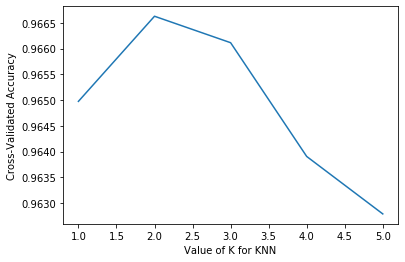

In [225]:
k_range = list(range(1, 6))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Summary:
#### Commands: pip install scikit-learn or conda install scikit-learn